In [1]:
import pandas as pd
import numpy as np

In [2]:

dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].to_numpy().astype('float32')
Y = dataset.iloc[:,[4]].to_numpy().astype('float32')

In [3]:
print(X.dtype)

float32


In [4]:
#拆分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25)

print("原始训练数据：")
print(X_train[0:3,:])
print("\nLable：")
print(Y_train[0:3])

原始训练数据：
[[3.30e+01 3.10e+04]
 [5.20e+01 1.38e+05]
 [2.20e+01 6.30e+04]]

Lable：
[[0.]
 [1.]
 [0.]]


In [5]:
#对性别label标签 编码
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#X_lable_train = LabelEncoder().fit_transform(X_train[:,[0]].ravel())
#X_lable_test = LabelEncoder().fit_transform(X_test[:,[0]].ravel())

In [6]:
#热编码 因为标签编码（0 1 2 3）是带距离的，容易误导机器学习。变成欧式距离相同的
#0 0 0 1 
#0 0 1 0
#0 1 0 0
#1 0 0 0
#onehotencoder = OneHotEncoder()
#X2_train = onehotencoder.fit_transform(X_lable_train.reshape(-1,1)).toarray()
#X2_test = onehotencoder.fit_transform(X_lable_test.reshape(-1,1)).toarray()

#X_train[:,[0]] = X2_train[:,[0]]
#X_test[:,[0]] = X2_test[:,[0]]

In [7]:
#标准化 
from sklearn.preprocessing import StandardScaler,scale
#每个特征独立缩放
SS1_train = StandardScaler().fit_transform(X_train[:,:])
SS1_test = StandardScaler().fit_transform(X_test[:,:])

#所有特征一起缩放 测试结果：错误率35/100 > 15/100
#SS2_train = StandardScaler().fit_transform(X_train[:,[1,2]].reshape(X_train[:,[1,2]].size,1))
#SS2_test = StandardScaler().fit_transform(X_test[:,[1,2]].reshape(X_test[:,[1,2]].size,1))
#X_train[:,[1,2]] = SS2_train.reshape((int)(SS2_train.size/2),2)
#X_test[:,[1,2]] = SS1_test.reshape((int)(SS2_test.size/2),2)

X_train[:,:] = SS1_train
X_test[:,:] = SS1_test

print("训练数据：")
print(X_train[0:10,:])
print("\nLable：")
print(Y_train[0:3])

#X_test[:,[1,2]] = StandardScaler().fit_transform(X_test[:,[1,2]]reshape(1,1))

训练数据：
[[-0.4187123  -1.1664327 ]
 [ 1.4458658   1.952995  ]
 [-1.4982047  -0.23351976]
 [-1.0075263   0.7285467 ]
 [-0.811255   -0.81659037]
 [ 1.4458658   0.5536255 ]
 [-1.3019334  -1.1372792 ]
 [-0.6149836   0.524472  ]
 [-1.3019334   0.524472  ]
 [-1.2037977   0.2329367 ]]

Lable：
[[0.]
 [1.]
 [0.]]


In [8]:
#训练模型
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#预测模型 较好的预测
y_pred = classifier.predict(X_test)
print(y_pred[0:5])
print(Y_test[0:5].ravel())

[0. 0. 1. 1. 1.]
[0. 0. 1. 1. 0.]


In [10]:
#生成混淆矩阵 2*2 衡量的是一个分类器分类的准确程度 
# *1 *2
# *3 *4  
# *1:预测0 真实0 
# *4:预测1 真实1
# *2 *3:两类错误
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print("混淆矩阵：")
print(cm)

混淆矩阵：
[[56  6]
 [16 22]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


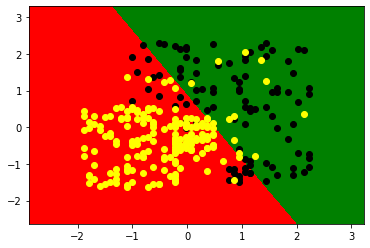

In [30]:
#可视化
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set,Y_set = X_train,Y_train
#生成网格状的数据 判断年龄与收入对结果的影响
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step = 0.01),
                     np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step = 0.01))

#生成一个测试矩阵
X1_X2_test = np.array([X1.ravel(),X2.ravel()]).T
#预测矩阵
Y_PRED = classifier.predict(X1_X2_test).reshape(X1.shape)
plt.contourf(X1,X2,Y_PRED, cmap=ListedColormap(('red', 'green')))




#将原始数据投射到图上，直观的看出模型的准确性
one_index_list=[]
zero_index_list=[]

for i in range( Y_set.size ):
    one_index_list.append((Y_set==1)[i][0])
    zero_index_list.append((Y_set==0)[i][0])
    
one_result = list( [X_set[one_index_list,0],X_set[one_index_list,1]])
zero_result = list( [X_set[zero_index_list,0],X_set[zero_index_list,1]])

plt.scatter(one_result[0],one_result[1], c = ListedColormap(('yellow', 'black'))(1), label=1)
plt.scatter(zero_result[0],zero_result[1],c = ListedColormap(('yellow', 'black'))(0), label=0)

plt.show()